Fred is a very predictable man. For instance, when he uses his laptop, all he does is watch TV shows. He keeps on watching TV shows until his battery dies. Also, he is a very meticulous man, i.e. he pays great attention to minute details. He has been keeping logs of every time he charged his laptop, which includes how long he charged his laptop for and after that how long was he able to watch the TV. Now, Fred wants to use this log to predict how long will he be able to watch TV for when he starts so that he can plan his activities after watching his TV shows accordingly.

Challenge

You are given access to Fred’s laptop charging log by reading from the file “trainingdata.txt”. The training data file will consist of 100 lines, each with 2 comma-separated numbers.

The first number denotes the amount of time the laptop was charged.
The second number denotes the amount of time the battery lasted.
The training data file can be downloaded here (this will be the same training data used when your program is run). The input for each of the test cases will consist of exactly 1 number rounded to 2 decimal places. For each input, output 1 number: the amount of time you predict his battery will last.

Sample Input

1.50

Sample Output

3.00

Scoring

Your score will be 10-X, where X is the sum of the distances you are from expected answer of each test case. For instance if there are 2 test cases with expected answer 4 and you print 3 for the first one and 6 for the second one your score will be 10-(1+2) = 7.

In [10]:
## Import here
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
## Load Training data
def load_training_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            x, y = map(float, line.strip().split(','))
            data.append((x, y))
    return np.array(data)

training_data = load_training_data('trainingdata.txt')


for x, y in training_data[:5]:
    print(x,y)

2.81 5.62
7.14 8.0
2.72 5.44
3.87 7.74
1.9 3.8


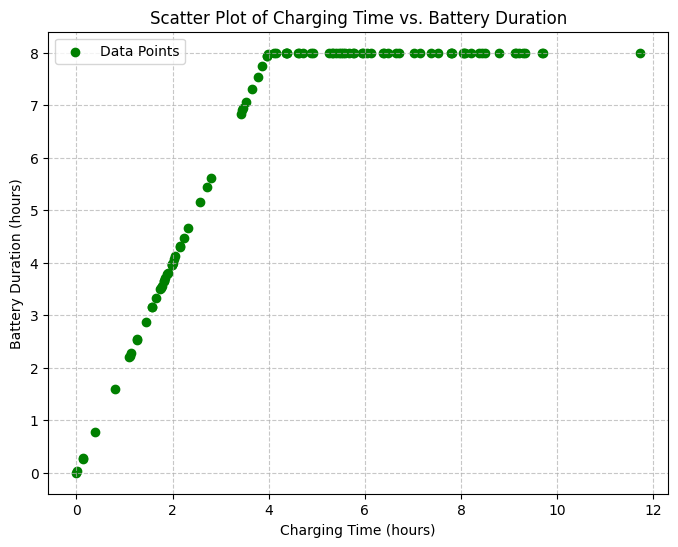

In [12]:
## Visualize the data in  scatter plot:
# Extracting x and y values
x_values = [point[0] for point in training_data]
y_values = [point[1] for point in training_data]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='green', label='Data Points')
plt.title('Scatter Plot of Charging Time vs. Battery Duration')
plt.xlabel('Charging Time (hours)')
plt.ylabel('Battery Duration (hours)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [13]:
# Split data into features (X) and target (y)
X = training_data[:, 0].reshape(-1, 1)  # Feature column
y = training_data[:, 1]  # Target column

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the model coefficients
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# Example usage: Predict for a new value
new_value = np.array([[4.0]])  # Replace with your value
predicted_value = model.predict(new_value)
print(f"Prediction for {new_value[0][0]}:", predicted_value[0])

Mean Squared Error: 1.9222788569962006
Coefficient (slope): 0.7074843087147252
Intercept: 2.953340769820885
Prediction for 4.0: 5.7832780046797865
